In [12]:
import numpy as np
import matplotlib as plt
import pymysql
from datetime import datetime, timedelta
from sshtunnel import SSHTunnelForwarder
import pandas as pd
% matplotlib inline
import seaborn as sns
import pickle

## 8/8 scikit-learning logistic regression

In [31]:
#import dataframe
df = pickle.load(open('df_for_ml.bin', 'rb'))

In [32]:
len(df)

1298247

In [33]:
df.head()

,crp_cd_x,crp_cls,crp_nm,rcp_dt,rcp_no,rpt_cat,rpt_nm,rcp_year,rcp_month,rcp_day,datecd,close,open,diff,high,low,open,volume,setting_y
0,023150,Y,MH에탄올,1999-03-25,19990325000001,E_1,사업보고서 (1998.12),1999,03,25,19990325023150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,001140,Y,국보,1999-03-25,19990325000003,E_1,사업보고서 (1998.12),1999,03,25,19990325001140,7800.0,7800.0,40.0,8000.0,7620.0,7800.0,10080.0,1
2,014160,Y,대영포장,1999-03-25,19990325000008,E_1,사업보고서 (1998.12),1999,03,25,19990325014160,10500.0,11500.0,150.0,11700.0,10500.0,11500.0,454110.0,0
3,002310,Y,아세아제지,1999-03-25,19990325000015,E_1,사업보고서 (1998.12),1999,03,25,19990325002310,10800.0,10550.0,300.0,11200.0,10500.0,10550.0,75860.0,1
4,015360,Y,예스코,1999-03-25,19990325000016,E_1,사업보고서 (1998.12),1999,03,25,19990325015360,25400.0,24900.0,0.0,25600.0,24900.0,24900.0,6900.0,1


In [71]:
#df['rpt_cat'] = df['rpt_cat'].str.replace('-', '_')
df.rpt_cat.unique()

array(['E_1', 'E_3', 'GS', 'G_06', 'G_08', 'L1_03', 'T_1', 'I_09', 'B_25',
       'I_07', 'L1_04', 'G_10', 'B_2', 'B_3', 'E_4', 'I_08', 'I_01',
       'B_1', 'B_23', 'K_3', 'T_2', 'B_16', 'K_5', 'B_4', 'T_5', 'B_7',
       'K_4', 'K_2', 'K_1', 'E_2', 'I_03', 'MS_04', 'B_5', 'I_10', 'I_17',
       'B_6', 'I_06', 'I_12', 'B_8', 'T_3', 'K_7', 'T_4', 'H2_09', 'G_09',
       'R_01', 'ET_01', 'G_04', 'N_01', 'N_03', 'R_02', 'R_03', 'B_9',
       'B_10', 'B_21', 'G_01', 'G_02', 'B_24', 'B_22', 'L1_01', 'S_03',
       'S_02', 'K_6', 'G_03', 'MS_01', 'H2_10', 'H2_13', 'C_03', 'H2_11',
       'G_07', 'H2_03', 'H2_04', 'L1_02', 'C_01', 'H2_01', 'N_05', 'N_04',
       'S_01', 'C_02', 'L2_04', 'L2_03', 'L2_05', 'B_13', 'G_11', 'H2_12',
       'I_02', 'I_05', 'I_14', 'I_04', 'H2_02', 'I_15', 'I_16', 'H1_02',
       'H1_09', 'H1_03', 'H1_05', 'H1_06', 'H1_08', 'H1_04', 'H1_07',
       'H2_07', 'L2_06', 'R_04', 'R_05', 'H2_06', 'B_14', 'B_12', 'B_15',
       'B_11', 'N_02', 'B_20', 'H2_05', 'I_20', 'B

In [72]:
df['rpt_big'] = df['rpt_cat'].str[0:2]

In [74]:
#df['rpt_big'] = df['rpt_big'].str.replace('_', '')
df['rpt_big']

1           E
2           E
3           E
4           E
5           E
8           E
9           E
10          E
11          E
12          E
13          E
14          E
15          E
16          E
17          E
18          E
19          E
20          E
21          E
22          E
23          E
24          E
25          E
26          E
27          E
28          E
29          E
30          E
31          E
32          E
           ..
1258928     K
1258929     K
1258930     S
1258933     K
1258939     K
1258941     B
1258945     G
1258946     B
1258948    GS
1258949     K
1258957    ET
1258961     K
1258968     K
1258974     E
1258975     E
1258993     K
1258996     K
1258997     B
1259001     K
1259002     K
1259003    H2
1259008     B
1259010     K
1259012     K
1259097     G
1259099     G
1259113     K
1259114     B
1259115     K
1259121     B
Name: rpt_big, Length: 772387, dtype: object

In [34]:
df.dropna(inplace = True)

In [35]:
#before dropna 1298247
#after dropna 772387
len(df)

772387

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [75]:
data = df[['rpt_cat', 'setting_y']]

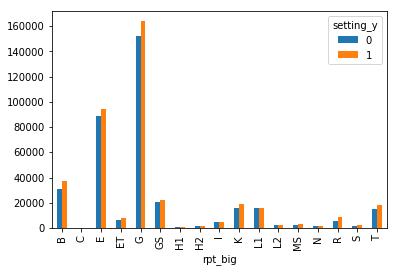

In [77]:
%matplotlib inline
pd.crosstab(df.rpt_big, df.setting_y).plot(kind='bar')

In [82]:
#기준 = 2008
before = df.loc[lambda df : df.rcp_year < '2008', :]
after = df.loc[lambda df : df.rcp_year > '2008', :]

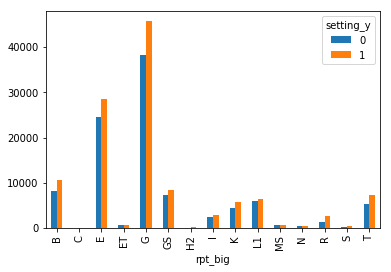

In [84]:
pd.crosstab(before.rpt_big, before.setting_y).plot(kind='bar')

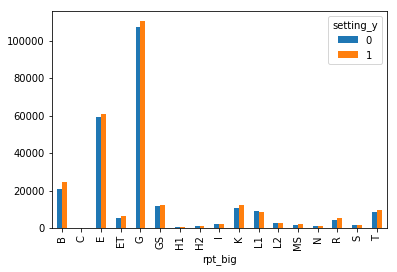

In [85]:
pd.crosstab(after.rpt_big, after.setting_y).plot(kind='bar')

In [100]:
#data갯수가 가장 많은 G
G= df[df['rpt_cat'].str.contains('G')]
G = G[G['rpt_cat'].str.contains('GS') == False]

In [101]:
G.head()

,crp_cd_x,crp_cls,crp_nm,rcp_dt,rcp_no,rpt_cat,rpt_nm,rcp_year,rcp_month,rcp_day,datecd,close,open,diff,high,low,open,volume,setting_y,rpt_big
1129,020400,K,대동금속,2000-03-06,20000306000022,G_06,일반투자자-주식등의대량보유(변동)보고서,2000,03,06,20000306020400,10350.0,12000.0,550.0,12200.0,9600.0,12000.0,20209.0,0,G
1131,001550,Y,조비,2000-03-06,20000306000025,G_08,임원ㆍ주요주주특정증권등소유상황보고서,2000,03,06,20000306001550,8700.0,9050.0,70.0,10050.0,8270.0,9050.0,95140.0,0,G
1132,001550,Y,조비,2000-03-06,20000306000026,G_06,일반투자자-주식등의대량보유(변동)보고서,2000,03,06,20000306001550,8700.0,9050.0,70.0,10050.0,8270.0,9050.0,95140.0,0,G
1135,016450,Y,한세예스24홀딩스,2000-03-07,20000307000032,G_08,임원ㆍ주요주주특정증권등소유상황보고서,2000,03,07,20000307016450,26750.0,28750.0,1900.0,28750.0,26600.0,28750.0,2840.0,0,G
1140,001550,Y,조비,2000-03-08,20000308000011,G_06,일반투자자-주식등의대량보유(변동)보고서,2000,03,08,20000308001550,9600.0,9100.0,500.0,10100.0,8600.0,9100.0,26920.0,1,G


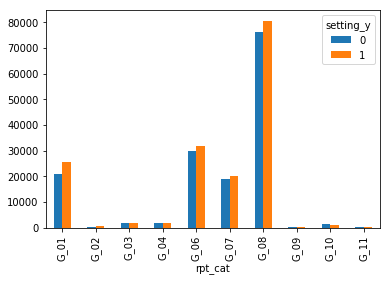

In [103]:
pd.crosstab(G.rpt_cat, G.setting_y).plot(kind='bar')

In [105]:
before_G = G.loc[lambda G : G.rcp_year < '2008', :]

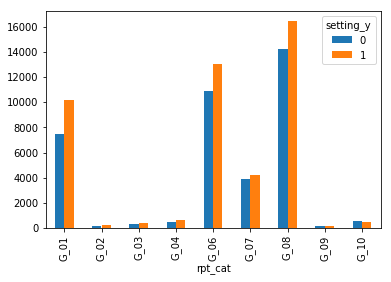

In [106]:
pd.crosstab(before_G.rpt_cat, before_G.setting_y).plot(kind='bar')